## **Trabajo Práctico Final Grupal: Bank Subscription**
____
__Universidad Tecnológica Nacional, Buenos Aires__\
__Ingeniería Industrial__\
__Ciencia de Datos - Curso I5521__
____

- Nombre: Candela
- Apellido: Abatedaga
- Legajo: 1673117



- Nombre: Martín
- Apellido: Aiscar
- Legajo: 1635487

**Entrega del trabajo: Viernes 25 de noviembre a las 23h59.**

## **En este trabajo práctico buscaremos predecir que clientes se subscribirán a una campaña de marketing.**

Trabajaremos con un dataset que cuenta con información de 45.211 clientes (samples) y tiene 17 variables (features) que muestran algunas características de estos.

## **Importación de librerías**

In [ ]:
## Importamos librerías para manipulación de datos.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
## Importamos librerías de aprendizaje automático.
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import set_config

In [ ]:
## Importamos librerías para poder crear Pipelines.
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
## Importamos librerías para realizar PCA.
from sklearn.decomposition import PCA

## **Google Colaboratory o Local**
El notebook podrá ser corrido directamente tanto localmente como en Google Colaboratory.


In [ ]:
## Verificamos si estamos corriendo el noteboock en Google Colaboratory.
var_google_colab = 'google.colab' in str(get_ipython())
print(var_google_colab)

## En el caso de estar en Google Colab, montamos nuestro Drive.
if var_google_colab:
  from google.colab import drive
  drive.mount('/content/gdrive',force_remount=True)
  ## Dirección root donde está el notebook.
  root_path = "/content/gdrive/MyDrive/Ciencia de Datos/tpfinal/"
  ## Direccion donde se guardarán las fotos.
  plot_path = root_path+"Imagenes/"

## En el caso de no estar en Google Colab, estamos corriendo localmente el notebook.
else:
  root_path = ""
  plot_path = root_path

True
Mounted at /content/gdrive


## **Dataset**


In [ ]:
## Importamos el dataset bajo el nombre "bank_ds".
bank_ds = pd.read_csv(root_path + 'bank_subscription.csv')

## Corroboramos haberlo cargado correctamente.
bank_ds.head()

,Unnamed: 0,Age,Job,Marital Status,Education,Credit,Balance (euros),Housing Loan,Personal Loan,Contact,Last Contact Day,Last Contact Month,Last Contact Duration,Campaign,Pdays,Previous,Poutcome,Subscription
0,0,58.0,management,married,NaN,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,1
1,1,44.0,technician,single,secondary,no,29.0,NaN,no,unknown,5,may,NaN,1,-1.0,0,unknown,1
2,2,NaN,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,1
3,3,47.0,blue-collar,married,unknown,no,NaN,yes,NaN,unknown,5,may,NaN,1,-1.0,0,unknown,1
4,4,NaN,unknown,single,unknown,NaN,1.0,no,no,unknown,5,may,NaN,1,-1.0,0,unknown,1


## **EDA**
Análisis exploratorio sobre de el dataset.

In [ ]:
## Imprimimos las dimensiones del dataset.
print(f'Dimensiones del dataset: {bank_ds.shape}')

Dimensiones del dataset: (45211, 18)


In [ ]:
## Imprimimos los nombres de cada columna, el tipo de dato que contiene cada una de ellas y la cantidad de valores no nulos presentes.
bank_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             45211 non-null  int64  
 1   Age                    40238 non-null  float64
 2   Job                    40238 non-null  object 
 3   Marital Status         40238 non-null  object 
 4   Education              40238 non-null  object 
 5   Credit                 40238 non-null  object 
 6   Balance (euros)        40238 non-null  float64
 7   Housing Loan           37525 non-null  object 
 8   Personal Loan          37525 non-null  object 
 9   Contact                45211 non-null  object 
 10  Last Contact Day       45211 non-null  int64  
 11  Last Contact Month     45211 non-null  object 
 12  Last Contact Duration  37525 non-null  float64
 13  Campaign               45211 non-null  int64  
 14  Pdays                  37525 non-null  float64
 15  Pr

In [ ]:
## Eliminamos la variable "Unnamed: 0" del dataset ya que no nos sirve para realizar machine learning y volvemos a guardar el dataset sin dicha variable bajo el nombre "bank_ds".
bank_ds = bank_ds.drop(columns=['Unnamed: 0'])

In [ ]:
## Imprimimos el head del dataset para verificar la eliminición.
bank_ds.head(15)

,Age,Job,Marital Status,Education,Credit,Balance (euros),Housing Loan,Personal Loan,Contact,Last Contact Day,Last Contact Month,Last Contact Duration,Campaign,Pdays,Previous,Poutcome,Subscription
0,58.0,management,married,NaN,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,1
1,44.0,technician,single,secondary,no,29.0,NaN,no,unknown,5,may,NaN,1,-1.0,0,unknown,1
2,NaN,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,1
3,47.0,blue-collar,married,unknown,no,NaN,yes,NaN,unknown,5,may,NaN,1,-1.0,0,unknown,1
4,NaN,unknown,single,unknown,NaN,1.0,no,no,unknown,5,may,NaN,1,-1.0,0,unknown,1
5,35.0,NaN,married,tertiary,no,231.0,yes,no,unknown,5,may,139.0,1,-1.0,0,unknown,1
6,28.0,management,single,tertiary,no,447.0,yes,yes,unknown,5,may,217.0,1,NaN,0,unknown,1
7,42.0,entrepreneur,divorced,tertiary,NaN,2.0,NaN,no,unknown,5,may,NaN,1,-1.0,0,unknown,1
8,58.0,retired,married,primary,no,121.0,yes,no,unknown,5,may,50.0,1,NaN,0,unknown,1
9,43.0,technician,single,secondary,no,593.0,yes,no,unknown,5,may,NaN,1,-1.0,0,unknown,1


In [ ]:
## Calculamos la cantidad de 'unknown' por columna.
bank_ds[bank_ds == 'unknown'].count()

Age                          0
Job                        254
Marital Status               0
Education                 1667
Credit                       0
Balance (euros)              0
Housing Loan                 0
Personal Loan                0
Contact                  13020
Last Contact Day             0
Last Contact Month           0
Last Contact Duration        0
Campaign                     0
Pdays                        0
Previous                     0
Poutcome                 36959
Subscription                 0
dtype: int64

In [ ]:
## Mostramos como se distribuye la variable "Contact".
bank_ds['Contact'].value_counts(normalize=True)

cellular     0.647741
unknown      0.287983
telephone    0.064276
Name: Contact, dtype: float64

In [ ]:
## Mostramos como se distribuye la variable "Poutcome".
bank_ds['Poutcome'].value_counts(normalize=True)

unknown    0.817478
failure    0.108403
other      0.040698
success    0.033421
Name: Poutcome, dtype: float64

In [ ]:
## Eliminamos las features 'Contact' y 'Poutcome' ya que tienen mucha información faltante.
bank_ds = bank_ds.drop(['Contact','Poutcome'], axis=1)

In [ ]:
## Imprimimos las nuevas dimensiones del dataset.
bank_ds.shape

(45211, 15)

In [ ]:
## Eliminamos los registros que contengan NaNs.
bank_ds.dropna(how ='any', inplace = True)

In [ ]:
## Verificamos haber eliminado los registros con NaNs.
bank_ds.isnull().sum(axis = 0)

Age                      0
Job                      0
Marital Status           0
Education                0
Credit                   0
Balance (euros)          0
Housing Loan             0
Personal Loan            0
Last Contact Day         0
Last Contact Month       0
Last Contact Duration    0
Campaign                 0
Pdays                    0
Previous                 0
Subscription             0
dtype: int64

In [ ]:
## Calculamos cuantos registros con 'unknown' tenemos ahora.
bank_ds[bank_ds == 'unknown'].count()

Age                        0
Job                       60
Marital Status             0
Education                470
Credit                     0
Balance (euros)            0
Housing Loan               0
Personal Loan              0
Last Contact Day           0
Last Contact Month         0
Last Contact Duration      0
Campaign                   0
Pdays                      0
Previous                   0
Subscription               0
dtype: int64

In [ ]:
## Eliminamos los registros que tenían 'unknown' en la feature 'Education' y luego los que lo tenían en la feature 'Job'.
bank_ds = bank_ds[~bank_ds['Education'].str.contains('unknown')]
bank_ds = bank_ds[~bank_ds['Job'].str.contains('unknown')]

In [ ]:
## Imprimimos las nuevas dimensiones del dataset.
print(f'Dimensiones del dataset: {bank_ds.shape}')

Dimensiones del dataset: (10243, 15)


In [ ]:
## Verificamos haber eliminado los registros con 'unknown'.
bank_ds[bank_ds == 'unknown'].count()

Age                      0
Job                      0
Marital Status           0
Education                0
Credit                   0
Balance (euros)          0
Housing Loan             0
Personal Loan            0
Last Contact Day         0
Last Contact Month       0
Last Contact Duration    0
Campaign                 0
Pdays                    0
Previous                 0
Subscription             0
dtype: int64

In [ ]:
## Calculamos el Sample to Feature Ratio (S2FR) y lo imprimimos.
S2FR = (bank_ds.shape[0]-1) / bank_ds.shape[1]
S2FR

682.8

In [ ]:
## Transformamos la feature 'Last Contact Month' de manera tal que sea numérica.
bank_ds['Last Contact Month'] = pd.to_datetime(bank_ds['Last Contact Month'], format='%b').dt.month

In [ ]:
## Vemos como se distribuye la feature 'Last Contact Month' ahora.
bank_ds['Last Contact Month'].value_counts()

5     3047
7     1612
8     1471
6     1161
11     916
4      669
2      598
1      310
10     179
9      128
3      101
12      51
Name: Last Contact Month, dtype: int64

In [ ]:
## Mostramos como se distribuye la variable "Subscription".
bank_ds['Subscription'].value_counts(normalize=True)

1    0.880894
2    0.119106
Name: Subscription, dtype: float64

In [ ]:
## Mostramos como se distribuye la variable "Subscription" en términos absolutos.
bank_ds['Subscription'].value_counts()

1    9023
2    1220
Name: Subscription, dtype: int64

In [ ]:
## Transformamos la variable "Subscription" de manera tal que tome valores 0 y 1.
bank_ds['Subscription'] = bank_ds['Subscription'].replace(1,0)
bank_ds['Subscription'] = bank_ds['Subscription'].replace(2,1)

In [ ]:
## Mostramos como se distribuye ahora la variable "Subscription" en términos absolutos.
bank_ds['Subscription'].value_counts()

0    9023
1    1220
Name: Subscription, dtype: int64

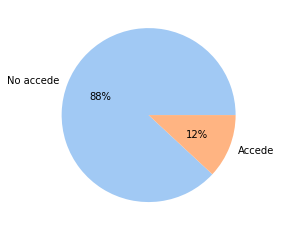

In [ ]:
## Realizamos un gráfico de torta para mostrar la distribucion de las personas que acceden a la campaña de marketing y las que no.
proporcion = pd.DataFrame(bank_ds.Subscription.value_counts(normalize=True))
porcentaje = list(set(proporcion['Subscription']))

colors = sns.color_palette('pastel')[0:5]
plt.pie(x = porcentaje, labels = ['No accede','Accede'], colors = colors, autopct = '%.0f%%')

## Descargamos la imagen del gráfico.
#plot_name = "proporcion_img"
#plot_save = str(plot_path + plot_name)
#plt.savefig(plot_save+".png",dpi=300)
plt.show()

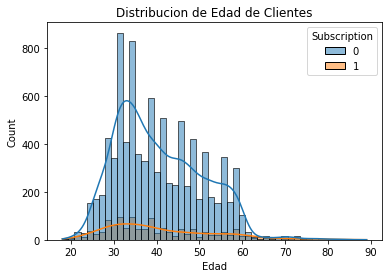

<Figure size 432x288 with 0 Axes>

In [ ]:
## Imprimimos la distribución de la edad de los clientes en función de si acceden o no a la campaña de MKT.
sns.histplot(data=bank_ds,x=bank_ds['Age'],bins=50,kde=True,color=colors,stat='count',hue='Subscription')
plt.xlabel("Edad")
plt.title('Distribucion de Edad de Clientes',size = 12)

## Descargamos la imagen.
#plot_name = "distedadcliente"
#plot_save = str(plot_path + plot_name)
#plt.savefig(plot_save+".png",dpi=300)
plt.show()

In [ ]:
## Calculamos la media de la edad en función del outcome de la variable 'Subscription'.
bank_ds.groupby('Subscription', as_index=False)['Age'].mean()

,Subscription,Age
0,0,40.614319
1,1,40.995902


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


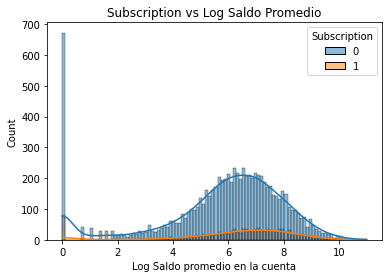

<Figure size 432x288 with 0 Axes>

In [ ]:
## Calculamos e imprimimos la distribución del Logaritmo del Saldo Promedio ('Balance (euros)') en función de la varaible 'Subscription'.
bank_ds['log_balance'] = np.log(1+bank_ds['Balance (euros)'])

sns.histplot(data=bank_ds,x='log_balance',bins=100,kde=True,color=colors,stat='count',hue='Subscription')
plt.xlabel("Log Saldo promedio en la cuenta")
plt.title('Subscription vs Log Saldo Promedio',size = 12)

## Descargamos la imagen del histograma.
#plot_name = "distsaldocliente"
#plot_save = str(plot_path + plot_name)
#plt.savefig(plot_save+".png",dpi=300)
plt.show()

bank_ds=bank_ds.drop(['log_balance'], axis=1)

In [ ]:
## Calculamos la media de la variable "Balance (euros)" en función de la variable "Subscription".
bank_ds.groupby('Subscription', as_index=False)['Balance (euros)'].mean()

,Subscription,Balance (euros)
0,0,1307.948465
1,1,1867.097541


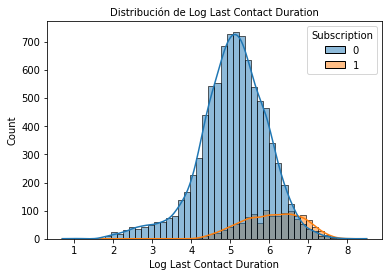

In [ ]:
## Imprimimos la distribución del logaritmo de la duración del ultimo contacto en función de la variable 'Subscription'.
bank_ds['log_duration'] = np.log(1+bank_ds['Last Contact Duration'])

sns.histplot(data=bank_ds,x=bank_ds['log_duration'],bins=50,kde=True,stat='count', hue='Subscription')
plt.xlabel('Log Last Contact Duration')
plt.title('Distribución de Log Last Contact Duration',size = 10)

## Descargamos la imagen del histograma.
#plot_name = "distduracioncliente"
#plot_save = str(plot_path + plot_name)
#plt.savefig(plot_save+".png",dpi=300)

plt.show()

bank_ds=bank_ds.drop(['log_duration'], axis=1)

In [ ]:
## Calculamos la media de la variable "Last Contact Duration" en función de la variable "Subscription".
bank_ds.groupby('Subscription', as_index=False)['Last Contact Duration'].mean()

,Subscription,Last Contact Duration
0,0,222.603015
1,1,560.350000


In [ ]:
## Mostramos las métricas más importantes de las variables numéricas para personas que si acceden a la campaña.
notsubcription = bank_ds.loc[bank_ds['Subscription']==1]
notsubcription.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1220.0,40.995902,12.760782,18.0,31.0,38.0,49.0,87.0
Balance (euros),1220.0,1867.097541,3543.249755,-1206.0,194.5,788.5,2175.0,52587.0
Last Contact Day,1220.0,15.041803,8.296933,1.0,8.0,14.0,21.0,31.0
Last Contact Month,1220.0,6.311475,2.786885,1.0,4.0,6.0,8.0,12.0
Last Contact Duration,1220.0,560.350000,404.597331,25.0,249.0,449.0,766.0,3881.0
Campaign,1220.0,2.103279,1.676696,1.0,1.0,2.0,3.0,17.0
Pdays,1220.0,61.054918,113.862168,-1.0,-1.0,-1.0,93.0,784.0
Previous,1220.0,1.095082,2.447977,0.0,0.0,0.0,1.0,30.0
Subscription,1220.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [ ]:
## Mostramos las métricas más importantes de las variables numéricas para personas que no acceden a la campaña.
subcription = bank_ds.loc[bank_ds['Subscription']==0]
subcription.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,9023.0,40.614319,10.069179,18.0,33.0,39.0,48.0,89.0
Balance (euros),9023.0,1307.948465,2890.960305,-6847.0,64.0,412.0,1330.5,59649.0
Last Contact Day,9023.0,15.903469,8.278990,1.0,8.0,16.0,21.0,31.0
Last Contact Month,9023.0,6.169567,2.362432,1.0,5.0,6.0,8.0,12.0
Last Contact Duration,9023.0,222.603015,208.980618,1.0,97.0,165.0,281.0,4918.0
Campaign,9023.0,2.809154,3.103608,1.0,1.0,2.0,3.0,50.0
Pdays,9023.0,34.828549,94.634851,-1.0,-1.0,-1.0,-1.0,871.0
Previous,9023.0,0.522664,3.419387,0.0,0.0,0.0,0.0,275.0
Subscription,9023.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


Se puede ver como aquellas personas que si acceden a la campaña de marketing tienen una duración de contacto promedio superior en comparación con aquellas que no acceden. Lo mismo suceden con el saldo promedio de los clientes.

Se procede con la división del data set en train y test.


In [ ]:
## Dividimos el dataset en la variable dependiente "y", en este caso "Subscription", y las independientes "x".
y = np.array(bank_ds[["Subscription"]])
x = bank_ds.drop(['Subscription'], axis=1)

In [ ]:
## Separamos el dataset en train y test. Corresponderán a test el 30% de las muestras.
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=4)

In [ ]:
## Imprimimos las dimensiones del set de train y del de test.
print(f'Dimensiones del set de train: {xtrain.shape}')
print(f'Dimensiones del set de test: {xtest.shape}')

Dimensiones del set de train: (7170, 14)
Dimensiones del set de test: (3073, 14)


* Generación de variables dummies para las variables categóricas.

* Estandarización de las varaibles numéricas.

In [ ]:
## Diferenciamos las variables numéricas de las categóricas.
numeric_features = ['Age','Balance (euros)','Last Contact Day','Last Contact Month','Last Contact Duration','Campaign','Pdays','Previous']

variables_cat= ['Job','Marital Status','Education','Credit','Housing Loan','Personal Loan']

In [ ]:
## Definimos la transformación a realizar para las variables numéricas. 
## Las estandarizaremos utilizando StandardScaler.
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

## Definimos la transformación a realizar para las variables categóricas.
## Generaremos dummies utilizado OneHotEncoder.
transformacion_cat = OneHotEncoder(handle_unknown="error", sparse=False)

In [ ]:
## Juntamos las transformaciones definidas previamente.
## Definimos el ColumnTransformer que será ejecutado al momento del fitting.
preprocesamiento = ColumnTransformer(
    transformers=[ 
        ("num", numeric_transformer, numeric_features),
        ("cat", transformacion_cat, variables_cat),
    ]
)

In [ ]:
## Imprimimos como queda la matriz X al aplicar el preprosesamiento definido.
pd.DataFrame(preprocesamiento.fit_transform(x))

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,-1.118360,-0.330238,-1.303659,-0.490871,-0.475877,-0.579192,-0.399573,-0.177774,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.991795,-0.384241,-1.303659,-0.490871,0.341011,-0.579192,-0.399573,-0.177774,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,-0.734695,-0.461052,-1.303659,-0.490871,-0.789774,-0.579192,-0.399573,-0.177774,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,1.471376,-0.199759,-1.303659,-0.490871,-0.373766,-0.579192,-0.399573,-0.177774,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
4,-0.063282,-0.461052,-1.303659,-0.490871,-0.309474,-0.579192,-0.399573,-0.177774,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10238,1.279543,-0.438914,-0.579460,1.991475,-0.362421,-0.579192,-0.399573,-0.177774,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
10239,2.814201,-0.352376,-0.096661,1.991475,-0.699009,-0.579192,0.595455,1.928405,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
10240,1.759124,-0.414764,0.024039,1.991475,-0.381330,-0.243444,1.528936,1.326640,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
10241,2.622369,-0.076659,0.024039,1.991475,-0.192236,-0.579192,1.528936,1.627523,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


##**Pipeline de Machine Learning**

In [ ]:
## Creamos un Pipeline para aplicar secuencialmente la lista de transformaciones definida previamente y un estimador final.
pipeline1 = Pipeline(
    steps=[("preprocesamiento",preprocesamiento),("estimador",SVC())]
)

In [ ]:
## Imprimimos el gráfico del workflow diseñado hasta acá.
set_config(display="diagram")
pipeline1

Pipeline(steps=[('preprocesamiento',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Balance (euros)',
                                                   'Last Contact Day',
                                                   'Last Contact Month',
                                                   'Last Contact Duration',
                                                   'Campaign', 'Pdays',
                                                   'Previous']),
                                                 ('cat',
                                                  OneHotEncoder(sparse=False),
                                                  ['Job', 'Marital Status',
                                                   'Education', 'Credit',
                                                   'Housing Loan',
                                                   'Personal Loan'])])),
                ('estimador', SVC())])

In [ ]:
## Definimos los hiperparámetros de los modelos a comparar.
parametros = [
    {
        "estimador": (LogisticRegression(),),
          "estimador__C": (0.001,1,10)
    },
    {
        "estimador": (SVC(probability=True),),
          "estimador__kernel":('linear', 'rbf'), 
          "estimador__C":(0.1,1, 10), 
          "estimador__gamma":(0.001, 0.01, 0.1,1, 10)          
    }
]

In [ ]:
## Creamos el Grid Search + Cross Validation.
grid_search1 = GridSearchCV(pipeline1, parametros,
                  refit = True,
                   cv = 5,
                   verbose=40)

In [ ]:
## Entrenamos.
grid_search1.fit(xtrain,ytrain.ravel())

Fitting 5 folds for each of 33 candidates, totalling 165 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocesamiento',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Balance '
                                                                          '(euros)',
                                                                          'Last '
                                                                          'Contact '
                                                                          'Day',
                                                                          'Last '
                                                                          'Contact '
                                                                          'Month',
                                                                          'Last '
                                                                          'Contact '
                                                                          'Duration',
                                                                          'Campaign',
                                                                          'Pdays',
                                                                          'Previous']),
                                                                        ('cat',
                                                                         OneHotEncoder(sparse=...
                                                                          'Marital '
                                                                          'Status',
                                                                          'Education',
                                                                          'Credit',
                                                                          'Housing '
                                                                          'Loan',
                                                                          'Personal '
                                                                          'Loan'])])),
                                       ('estimador', SVC())]),
             n_jobs=-1,
             param_grid=[{'estimador': (LogisticRegression(),),
                          'estimador__C': (0.001, 1, 10)},
                         {'estimador': (SVC(C=1, gamma=0.1, probability=True),),
                          'estimador__C': (0.1, 1, 10),
                          'estimador__gamma': (0.001, 0.01, 0.1, 1, 10),
                          'estimador__kernel': ('linear', 'rbf')}],
             verbose=40)

In [ ]:
## Mostramos información acerca de cada una de las combinaciones de hiper parámetros.
scores = grid_search1.cv_results_
scores_df = pd.DataFrame.from_dict(scores)
scores_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimador,param_estimador__C,param_estimador__gamma,param_estimador__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.081073,0.030052,0.016556,0.008405,LogisticRegression(),0.001,NaN,NaN,"{'estimador': LogisticRegression(), 'estimador...",0.884937,0.881450,0.884240,0.879358,0.882845,0.882566,0.002002,7
1,0.164525,0.040824,0.019936,0.009291,LogisticRegression(),1,NaN,NaN,"{'estimador': LogisticRegression(), 'estimador...",0.889121,0.889121,0.888424,0.886332,0.898187,0.890237,0.004104,2
2,0.173946,0.049086,0.009825,0.002109,LogisticRegression(),10,NaN,NaN,"{'estimador': LogisticRegression(), 'estimador...",0.889121,0.889121,0.888424,0.886332,0.898187,0.890237,0.004104,2
3,0.926395,0.167808,0.186415,0.030909,"SVC(C=1, gamma=0.1)",0.1,0.001,linear,"{'estimador': SVC(C=1, gamma=0.1), 'estimador_...",0.880753,0.880753,0.880753,0.880753,0.880056,0.880614,0.000279,12
4,1.566347,0.126405,0.463261,0.067170,"SVC(C=1, gamma=0.1)",0.1,0.001,rbf,"{'estimador': SVC(C=1, gamma=0.1), 'estimador_...",0.880753,0.880753,0.880753,0.880753,0.880056,0.880614,0.000279,12


In [ ]:
## Imprimimos cuál fue el mejor modelo y la combinación de parámetros.
print("Los mejores parámetros fueron %s con un score de %0.4f" % (grid_search1.best_params_, grid_search1.best_score_))

Los mejores parámetros fueron {'estimador': SVC(C=1, gamma=0.1), 'estimador__C': 1, 'estimador__gamma': 0.1, 'estimador__kernel': 'rbf'} con un score de 0.8912


In [ ]:
## Realizamos las predicciones sobre las muestras de test.
ypred1 = grid_search1.predict(xtest)
print(ypred1)

[0 0 0 ... 0 0 0]


In [ ]:
## Vemos como se distribuyen las predicciones.
unique, counts = np.unique(ypred1, return_counts=True)
dict(zip(unique, counts))

{0: 2983, 1: 90}

In [ ]:
## Computamos el accuracy.
test_acc = accuracy_score(ytest, ypred1)
print("El accuracy es " + str(test_acc))

El accuracy es 0.8906605922551253


In [ ]:
## Computamos e imprimimos el AUC.
yproba1 = grid_search1.predict_proba(xtest)
fpr1, tpr1, thresholds = roc_curve(ytest.astype(int), yproba1[:,1], drop_intermediate = False, pos_label=1)
auc_value1 = auc(fpr1, tpr1)
print("El AUC es = " + str(auc_value1))

El AUC es = 0.854296727635598


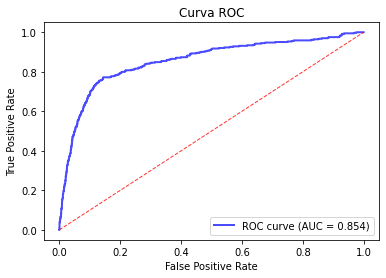

In [ ]:
## Graficamos la curva ROC.
plt.plot(fpr1, tpr1, lw=2, alpha=0.7 , label="ROC curve (AUC = %0.3f)" % auc_value1, color = 'b')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(False)
plt.legend(loc="lower right")
plt.title('Curva ROC')

## Descargamos la imagen del gráfico.
#plot_name = "roccurve"
#plot_save = str(plot_path + plot_name)
#plt.savefig(plot_save+".png",dpi=300)

plt.show()

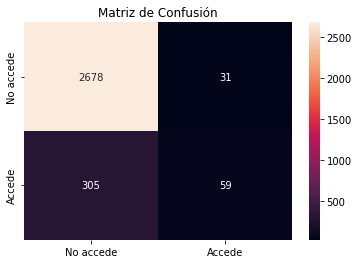

In [ ]:
## Calculamos e imprimimos la matriz de confusión.
cm = confusion_matrix(ytest, ypred1)
df_cm = pd.DataFrame(cm, index = ['No accede', 'Accede'], columns = ['No accede', "Accede"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True,fmt='g')
plt.title('Matriz de Confusión')

## Descargamos la imagen.
#plot_name = "confusionmatrix"
#plot_save = str(plot_path + plot_name)
#plt.savefig(plot_save+".png",dpi=300)

plt.show()

##**Analisis de Componentes Pricipales**

In [ ]:
## Definimos la proporción de variación que queremos explicar con los componentes a extraer.
n_comps = 0.8

## Definimos el PCA.
pca = PCA(n_components = n_comps)

## ## Definimos las transformaciones a realizar para las variables numéricas. 
## Las estandarizaremos utilizando StandardScaler y luego aplicamos el método PCA
numeric_transformer1 = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler()), ("pca", pca)]
)

## Juntamos las transformaciones definidas previamente.
## Definimos el ColumnTransformer que será ejecutado al momento del fitting.
preprocesamiento1 = ColumnTransformer(
    transformers=[ 
        ("num", numeric_transformer1, numeric_features),
        ("cat", transformacion_cat, variables_cat),
    ]
)

## Definimos un nuevo pipeline que incluye el método PCA.
pipeline2=Pipeline(
    steps=[('preprocesamiento',preprocesamiento1),('estimador',SVC())]
)

In [ ]:
## Imprimimos el gráfico del workflow diseñado hasta acá.
set_config(display="diagram")
pipeline2

Pipeline(steps=[('preprocesamiento',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=0.8))]),
                                                  ['Age', 'Balance (euros)',
                                                   'Last Contact Day',
                                                   'Last Contact Month',
                                                   'Last Contact Duration',
                                                   'Campaign', 'Pdays',
                                                   'Previous']),
                                                 ('cat',
                                                  OneHotEncoder(sparse=False),
                                                  ['Job', 'Marital Status',
                                                   'Education', 'Credit',
                                                   'Housing Loan',
                                                   'Personal Loan'])])),
                ('estimador', SVC())])

In [ ]:
## Observamos la cantidad de features con las que queda el nuevo dataset a entrenar luego de aplicarle el preprocesamiento que incluye el método PCA.
pd.DataFrame(preprocesamiento1.fit_transform(xtrain))

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,-0.644474,0.370519,-0.859680,0.792350,-1.179097,0.249241,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.964884,-0.522642,-0.690361,-1.947633,0.115890,1.145652,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.131645,0.157250,-0.519654,-1.393714,-0.729715,0.951675,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,0.161629,-1.144233,-0.464309,0.639883,-0.843985,-0.157130,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,0.665262,-1.671518,-1.222033,2.445258,0.089230,0.800221,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7165,0.149791,-1.368057,0.607243,-0.462427,0.479346,-0.478561,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
7166,-1.285497,1.643290,-0.801707,-0.146292,-0.333346,-1.171242,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
7167,0.034736,-0.303223,-0.109122,-0.795763,0.472837,-0.277924,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
7168,0.138983,-0.664832,-0.354438,0.201521,0.352620,0.355163,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0


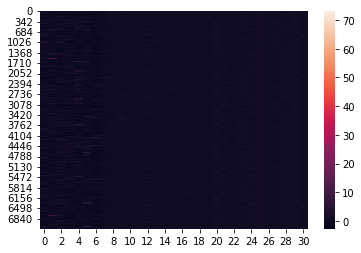

In [ ]:
## Imprimimos un heatmap del dataset de Train luego de aplicar el preprocesamiento que no incluye el PCA.
sns.heatmap(pd.DataFrame(preprocesamiento.fit_transform(xtrain)))

## Descargamos la imagen.
#plot_name = "datasetsinpca"
#plot_save = str(plot_path + plot_name)
#plt.savefig(plot_save+".png",dpi=300)

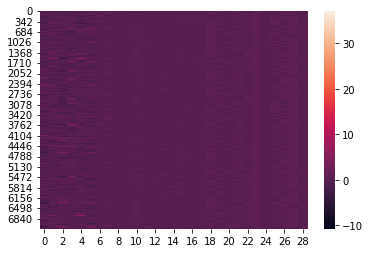

In [ ]:
## Imprimimos un heatmap del dataset de Train luego de aplicar el preprocesamiento que incluye el PCA.
sns.heatmap(preprocesamiento1.fit_transform(xtrain))

## Descargamos la imagen.
#plot_name = "datasetconpca"
#plot_save = str(plot_path + plot_name)
#plt.savefig(plot_save+".png",dpi=300)

In [ ]:
## Creamos el Grid Search + Cross Validation. 
grid_search2 = GridSearchCV(pipeline2, parametros,
                  refit = True, ## Refit nos devuelve el modelo con los mejores parametros encontrados.
                   cv = 5, ## Indica la cantidad de folds.
                   verbose=40)

In [ ]:
## Entrenamos.
grid_search2.fit(xtrain,ytrain.ravel())

Fitting 5 folds for each of 33 candidates, totalling 165 fits
[CV 1/5; 1/33] START estimador=LogisticRegression(), estimador__C=0.001.........
[CV 1/5; 1/33] END estimador=LogisticRegression(), estimador__C=0.001;, score=0.885 total time=   0.0s
[CV 2/5; 1/33] START estimador=LogisticRegression(), estimador__C=0.001.........
[CV 2/5; 1/33] END estimador=LogisticRegression(), estimador__C=0.001;, score=0.883 total time=   0.0s
[CV 3/5; 1/33] START estimador=LogisticRegression(), estimador__C=0.001.........
[CV 3/5; 1/33] END estimador=LogisticRegression(), estimador__C=0.001;, score=0.884 total time=   0.1s
[CV 4/5; 1/33] START estimador=LogisticRegression(), estimador__C=0.001.........
[CV 4/5; 1/33] END estimador=LogisticRegression(), estimador__C=0.001;, score=0.879 total time=   0.1s
[CV 5/5; 1/33] START estimador=LogisticRegression(), estimador__C=0.001.........
[CV 5/5; 1/33] END estimador=LogisticRegression(), estimador__C=0.001;, score=0.882 total time=   0.0s
[CV 1/5; 2/33] STA

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocesamiento',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler()),
                                                                                         ('pca',
                                                                                          PCA(n_components=0.8))]),
                                                                         ['Age',
                                                                          'Balance '
                                                                          '(euros)',
                                                                          'Last '
                                                                          'Contact '
                                                                          'Day',
                                                                          'Last '
                                                                          'Contact '
                                                                          'Month',
                                                                          'Last '
                                                                          'Contact '
                                                                          'Duration',
                                                                          'Campaign',
                                                                          'Pdays',
                                                                          'Previous']...
                                                                         ['Job',
                                                                          'Marital '
                                                                          'Status',
                                                                          'Education',
                                                                          'Credit',
                                                                          'Housing '
                                                                          'Loan',
                                                                          'Personal '
                                                                          'Loan'])])),
                                       ('estimador', SVC())]),
             param_grid=[{'estimador': (LogisticRegression(C=1),),
                          'estimador__C': (0.001, 1, 10)},
                         {'estimador': (SVC(C=1, gamma=0.1, probability=True),),
                          'estimador__C': (0.1, 1, 10),
                          'estimador__gamma': (0.001, 0.01, 0.1, 1, 10),
                          'estimador__kernel': ('linear', 'rbf')}],
             verbose=40)

In [ ]:
## Mostramos información acerca de cada una de las combinaciones de hiper parámetros.
scores = grid_search2.cv_results_
scores_df = pd.DataFrame.from_dict(scores)
scores_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimador,param_estimador__C,param_estimador__gamma,param_estimador__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.040509,0.001780,0.009130,0.001075,LogisticRegression(C=1),0.001,NaN,NaN,"{'estimador': LogisticRegression(C=1), 'estima...",0.884937,0.882845,0.883543,0.879358,0.882148,0.882566,0.001850,8
1,0.085078,0.008512,0.009849,0.002472,LogisticRegression(C=1),1,NaN,NaN,"{'estimador': LogisticRegression(C=1), 'estima...",0.888424,0.889819,0.889121,0.886332,0.896095,0.889958,0.003283,1
2,0.098951,0.008818,0.008809,0.000177,LogisticRegression(C=1),10,NaN,NaN,"{'estimador': LogisticRegression(C=1), 'estima...",0.888424,0.889819,0.889121,0.886332,0.895397,0.889819,0.003024,2
3,1.772963,0.092267,0.056888,0.002765,"SVC(C=1, gamma=0.1, probability=True)",0.1,0.001,linear,"{'estimador': SVC(C=1, gamma=0.1, probability=...",0.880753,0.880753,0.880753,0.880753,0.880056,0.880614,0.000279,10
4,2.719510,0.040963,0.144477,0.002065,"SVC(C=1, gamma=0.1, probability=True)",0.1,0.001,rbf,"{'estimador': SVC(C=1, gamma=0.1, probability=...",0.880753,0.880753,0.880753,0.880753,0.880056,0.880614,0.000279,10


In [ ]:
## Imprimimos cual fue el mejor modelo y la combinación de hiper parámetros.
print("Los mejores parametros fueron %s con un score de %0.4f" % (grid_search2.best_params_, grid_search2.best_score_))

Los mejores parametros fueron {'estimador': LogisticRegression(C=1), 'estimador__C': 1} con un score de 0.8900


In [ ]:
## Realizamos las predicciones sobre las muestras de test.
ypred2 = grid_search2.predict(xtest)
print(ypred2)

[0 0 0 ... 0 0 0]


In [ ]:
## Computamos el accuracy.
test_acc = accuracy_score(ytest, ypred2)
print("El accuracy es " + str(test_acc))

El accuracy es 0.8935893263911487


In [ ]:
## Computamos el AUC.
yproba2 = grid_search2.predict_proba(xtest)
fpr2, tpr2, thresholds = roc_curve(ytest.astype(int), yproba2[:,1], drop_intermediate = False, pos_label=1)
auc_value2 = auc(fpr2, tpr2)
print("El AUC es = " + str(auc_value2))

El AUC es = 0.8677049233527638


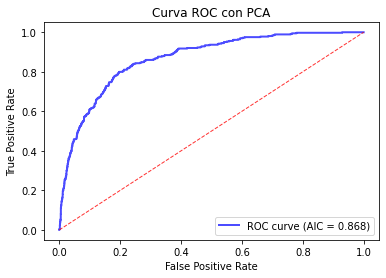

In [ ]:
# Graficamos la curva ROC.
plt.plot(fpr2, tpr2, lw=2, alpha=0.7 , label="ROC curve (AIC = %0.3f)" % auc_value2, color = 'b')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(False)
plt.legend(loc="lower right")
plt.title('Curva ROC con PCA')

## Descargamos la imagen.
#plot_name = "roccurveconpca"
#plot_save = str(plot_path + plot_name)
#plt.savefig(plot_save+".png",dpi=300)

plt.show()

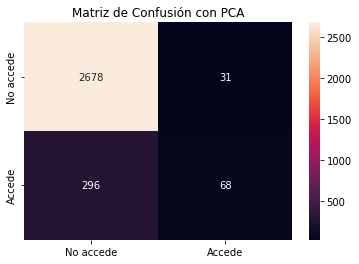

In [ ]:
## Calculamos e imprimimos la matriz de confusión.
cm = confusion_matrix(ytest, ypred2)
df_cm = pd.DataFrame(cm, index = ['No accede', 'Accede'], columns = ['No accede', "Accede"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True,fmt='g')
plt.title('Matriz de Confusión con PCA')

## Descargamos la imagen.
#plot_name = "confusionmatrixconpca"
#plot_save = str(plot_path + plot_name)
#plt.savefig(plot_save+".png",dpi=300)

plt.show()